/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


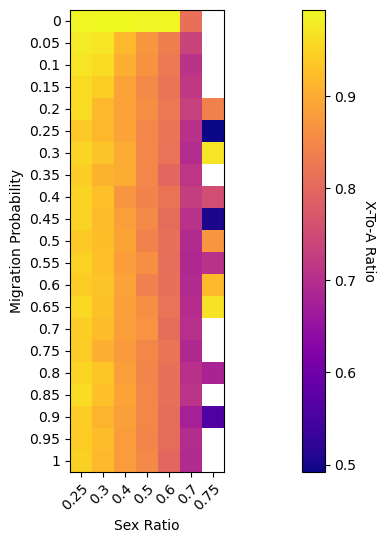

In [4]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/Migration_SexRatio/"
#LSexRatio = [0.25,0.3,0.4,0.5,0.6,0.7,0.75] with 0.75
LSexRatio = [0.25,0.3,0.4,0.5,0.6,0.7,0.75]   
LProbMig = [0]+[k/20 for k in range(1,20)]+[1]

HeatMap = np.zeros((len(LProbMig),len(LSexRatio)))

for i in range(len(LProbMig)):
    ProbMig = LProbMig[i]
    for j in range(len(LSexRatio)):
        SR = LSexRatio[j]
        Pi_ratio = []
        for NUM in range(1,101):
            File = FOLDER+"Pi_Prob_Mig"+str(ProbMig)+",SexRatio"+str(SR)+","+str(NUM)+".txt"
            if os.path.isfile(File):
                Text = open(File, 'r')
                Values = Text.read().split()
                Pi_ratio.append(float(Values[1])/float(Values[0]))
                Text.close()       
        Pi_median = np.median(Pi_ratio)
        HeatMap[i,j] = Pi_median

fig, ax = mp.subplots(figsize=(20, 6))
im = ax.imshow(HeatMap,"plasma")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("X-To-A Ratio", rotation=-90, va="bottom")
ax.set_xticks(range(len(LSexRatio)), labels=LSexRatio,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(LProbMig)), labels=LProbMig)
ax.set_xlabel("Sex Ratio")
ax.set_ylabel("Migration Probability")

#for i in range(len(LProbMig)):
#    for j in range(len(LSexRatio)):
#        if HeatMap[i, j] > 0.8:
#            text = ax.text(j, i, round(HeatMap[i, j],2),
#                       ha="center", va="center", color="black")
 #       else:
#            text = ax.text(j, i, round(HeatMap[i, j],2),
#                       ha="center", va="center", color="w")

mp.show()



 **Analyse :**
 - As we saw before, looking at one colomne, the probability of migration doesn't not have an important impact on the *X-to-A ratio*.
 - On the opposite, the SexRatio has a higher influence. 